## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import sqrt 

### Loading the dataset

In [2]:
df = pd.read_csv('house_price_prediction.csv')

In [3]:
df.head(5)

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population,price
0,1,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,1,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,1,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,1,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


In [4]:
df.describe()

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population,price
count,5012.0,5009.000000,5010.000000,5011.000000,5009.000000,5.012000e+03
mean,1.0,68577.804938,5.977508,6.987906,36155.832559,1.231947e+06
std,0.0,10661.033166,0.991472,1.006453,9928.823462,3.529525e+05
min,1.0,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,1.0,61482.244790,5.322274,6.298437,29403.512060,9.981375e+05
50%,1.0,68814.925610,5.969828,7.003188,36183.287800,1.232983e+06
75%,1.0,75780.621120,6.652302,7.667048,42841.741620,1.471756e+06
max,1.0,107701.748400,9.519088,10.759588,69621.713380,2.469066e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5012 non-null   int64  
 1   avg_income          5009 non-null   float64
 2   avg_area_house_age  5010 non-null   float64
 3   avg_area_num_rooms  5011 non-null   float64
 4   avg_population      5009 non-null   float64
 5   price               5012 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 235.1 KB


### Some rows of features contain null values. This may affect the performance of the model. Therefore we drop the samples containing null values.

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5005 entries, 0 to 5011
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5005 non-null   int64  
 1   avg_income          5005 non-null   float64
 2   avg_area_house_age  5005 non-null   float64
 3   avg_area_num_rooms  5005 non-null   float64
 4   avg_population      5005 non-null   float64
 5   price               5005 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 273.7 KB


## Feature scaling
### Scaling down features to the same range for better performance and reduce computations  using mean square normalization.

In [8]:
scaled_df = (df - df.mean()) / df.std()

## Data visualization

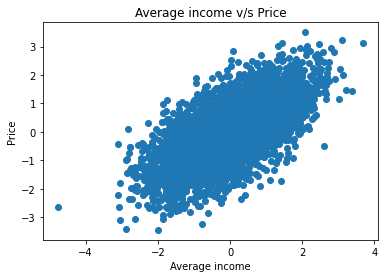

In [9]:
plt.scatter(scaled_df['avg_income'],scaled_df['price'])
plt.xlabel("Average income")
plt.ylabel("Price")
plt.title("Average income v/s Price")
plt.show()

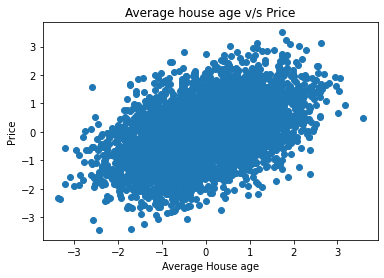

In [10]:
plt.scatter(scaled_df['avg_area_house_age'],scaled_df['price'])
plt.xlabel("Average House age")
plt.ylabel("Price")
plt.title("Average house age v/s Price")
plt.show()

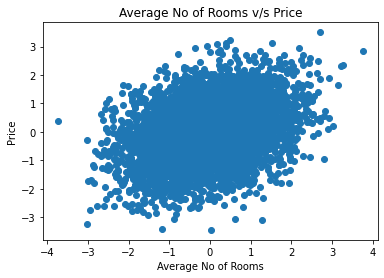

In [11]:
plt.scatter(scaled_df['avg_area_num_rooms'],scaled_df['price'])
plt.xlabel("Average No of Rooms")
plt.ylabel("Price")
plt.title("Average No of Rooms v/s Price")
plt.show()

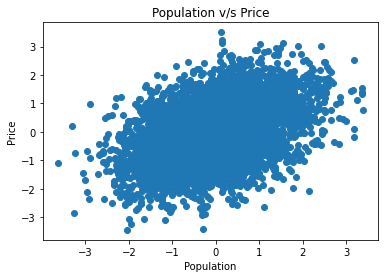

In [12]:
plt.scatter(scaled_df['avg_population'],scaled_df['price'])
plt.xlabel("Population")
plt.ylabel("Price")
plt.title("Population v/s Price")
plt.show()

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Windows\anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\Windows\anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population,price
X_0,nan,nan,nan,nan,nan,nan
avg_income,nan,1.000000,-0.002290,-0.009850,-0.015913,0.640288
avg_area_house_age,nan,-0.002290,1.000000,-0.011914,-0.018883,0.451494
avg_area_num_rooms,nan,-0.009850,-0.011914,1.000000,0.002442,0.335533
avg_population,nan,-0.015913,-0.018883,0.002442,1.000000,0.408922
price,nan,0.640288,0.451494,0.335533,0.408922,1.000000


## Train and Test Split

In [14]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,:-1],scaled_df['price'], test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3753, 5) (1252, 5) (3753,) (1252,)


In [15]:
X_train['X_0']=1
X_test['X_0']=1

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Approach 1

## Linear regression modelling using Scikit learn inbuilt functions

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
coef = model.coef_
intercept = model.intercept_

In [18]:
coef

array([0.        , 0.65145737, 0.46628472, 0.34698781, 0.42679615])

In [19]:
intercept

0.004174172536181725

## Mean squared Error (MSE) 

In [20]:
loss_1 = sum((y_pred - y_test)**2)
MSE_1 = loss_1/len(y_pred)
MSE_1

0.08331332827193688

# Approach 2

## Linear regression modelling without using Scikit learn inbuilt functions  

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [22]:
n= 5
t = np.zeros(n)
m = len(X_train)
alpha = 0.2
epochs = 50
cost = np.array([])
theta_0 = np.array([])
theta_1 = np.array([])
theta_2 = np.array([])
theta_3 = np.array([])
theta_4 = np.array([])

In [23]:
for epoch in range(0,epochs):
    for j in range(n):
        for i in range(m):
            t[j] = t[j] - (alpha/m)*((sum(X_train[i]*t)-y_train[i])*X_train[i][j])
            c = ((sum(X_train[i]*t)-y_train[i])**2)/(2*m)
    print(c)
    cost = np.append(cost,c,axis = None)
    theta_0 = np.append(theta_0,t[0],axis = None) 
    theta_1 = np.append(theta_1,t[1],axis = None)
    theta_2 = np.append(theta_2,t[2],axis = None)
    theta_3 = np.append(theta_3,t[3],axis = None)
    theta_4 = np.append(theta_4,t[4],axis = None)

0.00010235451829092182
7.771089624494023e-05
5.9931884205199075e-05
4.70009191133663e-05
3.7514790230084053e-05
3.049308981836027e-05
2.5247596998815194e-05
2.1292611324720197e-05
1.8283289231212017e-05
1.5973149299849638e-05
1.4184715104998376e-05
1.2789175124169878e-05
1.1692242255510337e-05
1.0824284556531457e-05
1.013340576686926e-05
9.580568807820016e-06
9.136138930578664e-06
8.777417185811071e-06
8.486867807089264e-06
8.250834297434353e-06
8.058601681975808e-06
7.90170554605786e-06
7.773418263995938e-06
7.668363437698544e-06
7.582223876487377e-06
7.511518423263051e-06
7.453429912667769e-06
7.405671456527659e-06
7.3663817243265935e-06
7.3340423578860064e-06
7.307412430612934e-06
7.285476140727303e-06
7.26740085904345e-06
7.2525033357139865e-06
7.240222377033986e-06
7.230096682332578e-06
7.221746816963616e-06
7.21486051524143e-06
7.2091806745349576e-06
7.2044955314242206e-06
7.200630612100183e-06
7.197442128854203e-06
7.194811557570432e-06
7.192641181377881e-06
7.190850425824619e-0

In [24]:
t

array([0.00458992, 0.65112156, 0.46594223, 0.34660187, 0.4267638 ])

In [25]:
Epochs = list(range(epochs))

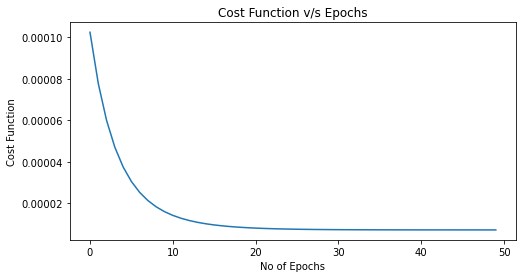

In [26]:
plt.figure(figsize=(8,4))
plt.plot(Epochs,cost)
plt.xlabel("No of Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function v/s Epochs")
plt.show()

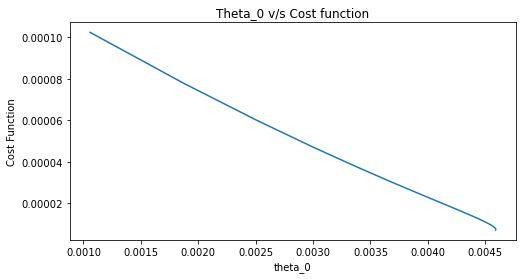

In [27]:
plt.figure(figsize=(8,4))
plt.plot(theta_0,cost)
plt.xlabel("theta_0")
plt.ylabel("Cost Function")
plt.title("Theta_0 v/s Cost function")
plt.show()

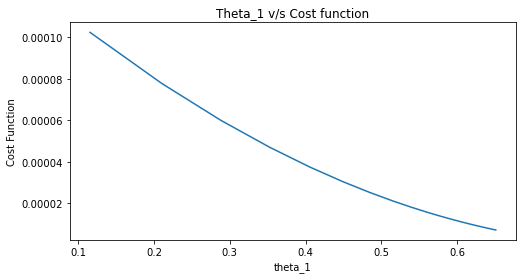

In [28]:
plt.figure(figsize=(8,4))
plt.plot(theta_1,cost)
plt.xlabel("theta_1")
plt.ylabel("Cost Function")
plt.title("Theta_1 v/s Cost function")
plt.show()

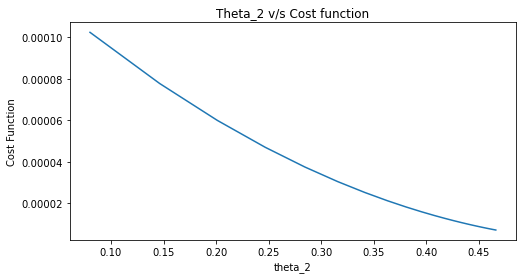

In [29]:
plt.figure(figsize=(8,4))
plt.plot(theta_2,cost)
plt.xlabel("theta_2")
plt.ylabel("Cost Function")
plt.title("Theta_2 v/s Cost function")
plt.show()

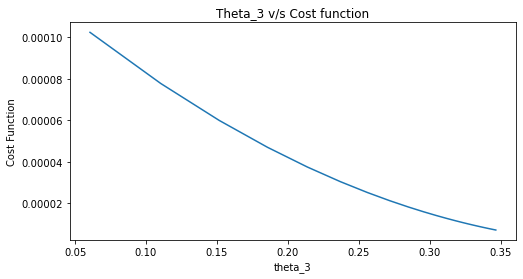

In [30]:
plt.figure(figsize=(8,4))
plt.plot(theta_3,cost)
plt.xlabel("theta_3")
plt.ylabel("Cost Function")
plt.title("Theta_3 v/s Cost function")
plt.show()

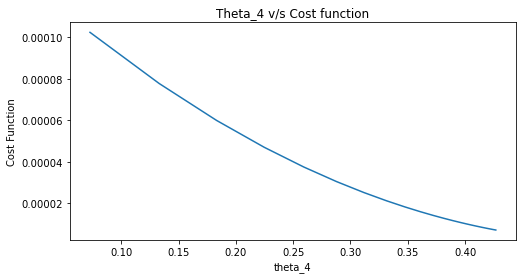

In [31]:
plt.figure(figsize=(8,4))
plt.plot(theta_4,cost)
plt.xlabel("theta_4")
plt.ylabel("Cost Function")
plt.title("Theta_4 v/s Cost function")
plt.show()

## Predictions

In [32]:
pred_2= list()
for e in X_test:
    pred_2.append(sum(t*e))
y_pred_2=np.array(pred_2)   
y_pred_2

array([-1.69824021,  0.49356488,  0.56752005, ...,  0.49262328,
       -0.92030968, -1.06731585])

## Mean squared error (MSE)

In [33]:
loss_2 = sum((y_pred_2 - y_test)**2)
MSE_2 = loss_2/len(y_test)
MSE_2

0.08332352339083865

## Comparing weights of both the approaches

### Weights for linear regression using scikit learn inbuilt functions 

In [34]:
coef

array([0.        , 0.65145737, 0.46628472, 0.34698781, 0.42679615])

### Weights for linear regression without using inbuilt functions 

In [35]:
t

array([0.00458992, 0.65112156, 0.46594223, 0.34660187, 0.4267638 ])

## Comparing Mean squared error of both the approaches

### MSE for linear regression using scikit learn inbuilt functions 

In [36]:
MSE_1

0.08331332827193688

### MSE for linear regression without using inbuilt functions 

In [37]:
MSE_2

0.08332352339083865

## Implementation

In [38]:
#### Sample implementations of house price prediction model
# avg_income = float(input("Enter your average income rs:"))
# avg_area_house_age = float(input("Enter expected area of house in sqft:"))
# avg_area_num_rooms = float(input("Enter expected no of rooms :"))
# avg_population = float(input("Enter average population in that area :"))

# new = sum(t*[1,avg_income,avg_area_house_age,avg_area_num_rooms,avg_population])
# print("The predicted house price is rs.","{:.2f}".format(new),"/-")

Enter your average income rs:25000
Enter expected area of house in sqft:500
Enter expected no of rooms :5
Enter average population in that area :700000
The predicted house price is rs. 315247.41 /-
